In [1]:
import sys
import os
sys.path.append('/home/yutanagano/Projects/nnfs')
os.chdir('/home/yutanagano/Projects/nnfs')

# Data loading

In [2]:
labels = os.listdir('fashion_mnist_images/train/')
print(labels)

['9', '0', '3', '2', '7', '5', '1', '6', '4', '8']


In [3]:
files = os.listdir('fashion_mnist_images/train/0')
print(files[:10])
print(len(files))

['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png']
6000


In [4]:
import cv2

image_data = cv2.imread('fashion_mnist_images/train/7/0002.png', cv2.IMREAD_UNCHANGED)
print(image_data)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0  49
  135 182 150  59   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

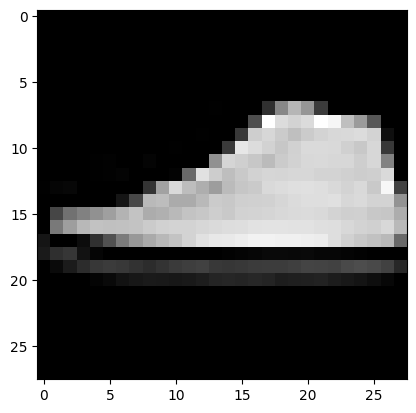

In [5]:
import matplotlib.pyplot as plt

plt.imshow(image_data, cmap='gray')
plt.show()

In [6]:
import numpy as np

def load_mnist_dataset(dataset, path):
    # Scan all the directories and create a list of labels
    labels = os.listdir(os.path.join(path, dataset))
    # Create lists for samples and labels
    X = []
    y = []
    # For each label folder
    for label in labels:
        # And for each image in given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            # Read the image
            image = cv2.imread(os.path.join(
                path, dataset, label, file
            ), cv2.IMREAD_UNCHANGED)
            # And append it and a label to the lists
            X.append(image)
            y.append(label)
    # Convert the data to proper numpy arrays and return
    return np.array(X), np.array(y).astype('uint8')


def create_data_mnist(path):
    # Load both sets separately
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    # And return all the data
    return X, y, X_test, y_test

In [7]:
X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')

In [8]:
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

In [9]:
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [10]:
keys = np.arange(X.shape[0])
print(keys)

[    0     1     2 ... 59997 59998 59999]


In [11]:
import nnfs
nnfs.init()

np.random.shuffle(keys)
print(keys)

[ 3048 19563 58303 ... 42613 43567  2732]


In [12]:
X = X[keys]
y = y[keys]

# Training

In [13]:
import nnn

model = nnn.module.Module()

model.add(nnn.layer.Dense(X.shape[1], 64))
model.add(nnn.layer.Dropout(0.1))
model.add(nnn.activation.Relu())
model.add(nnn.layer.Dense(64, 64))
model.add(nnn.layer.Dropout(0.1))
model.add(nnn.activation.Relu())
model.add(nnn.layer.Dense(64, 10))
model.add(nnn.activation.Softmax())

model.set(
    loss=nnn.loss.CategoricalCrossEntropy(),
    optimiser=nnn.optimiser.Adam(decay=1e-4),
    accuracy=nnn.accuracy.Categorical()
)

model.finalise()

In [14]:
model.train(X, y, validation_data=(X_test, y_test), epochs=10, batch_size=256, print_every=100)

epoch: 1
step: 0, acc: 0.078, loss: 2.303 (data_loss: 2.303, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.652, loss: 0.828 (data_loss: 0.828, reg_loss: 0.000), lr: 0.0009900990099009901
step: 200, acc: 0.734, loss: 0.718 (data_loss: 0.718, reg_loss: 0.000), lr: 0.000980392156862745
step: 234, acc: 0.781, loss: 0.698 (data_loss: 0.698, reg_loss: 0.000), lr: 0.0009771350400625367
training, acc: 0.651, loss: 0.948 (data_loss: 0.948, reg_loss: 0.000), lr: 0.0009771350400625367
validation, acc: 0.779, loss: 0.600
epoch: 2
step: 0, acc: 0.785, loss: 0.587 (data_loss: 0.587, reg_loss: 0.000), lr: 0.0009770395701025891
step: 100, acc: 0.762, loss: 0.621 (data_loss: 0.621, reg_loss: 0.000), lr: 0.0009675858732462506
step: 200, acc: 0.824, loss: 0.541 (data_loss: 0.541, reg_loss: 0.000), lr: 0.0009583133684714901
step: 234, acc: 0.833, loss: 0.523 (data_loss: 0.523, reg_loss: 0.000), lr: 0.0009552010698251983
training, acc: 0.794, loss: 0.558 (data_loss: 0.558, reg_loss: 0.000), lr: 0.000955201

In [18]:
model.evaluate(X_test, y_test)

validation, acc: 0.869, loss: 0.368


# Saving

In [15]:
model.save_parameters('fashion_mnist.params')

In [16]:
model.save('fashion_mnist.model')

# Loading

In [17]:
new_model_with_loaded_params = nnn.module.Module()

new_model_with_loaded_params.add(nnn.layer.Dense(X.shape[1], 64))
new_model_with_loaded_params.add(nnn.layer.Dropout(0.1))
new_model_with_loaded_params.add(nnn.activation.Relu())
new_model_with_loaded_params.add(nnn.layer.Dense(64, 64))
new_model_with_loaded_params.add(nnn.layer.Dropout(0.1))
new_model_with_loaded_params.add(nnn.activation.Relu())
new_model_with_loaded_params.add(nnn.layer.Dense(64, 10))
new_model_with_loaded_params.add(nnn.activation.Softmax())

new_model_with_loaded_params.set(
    loss=nnn.loss.CategoricalCrossEntropy(),
    accuracy=nnn.accuracy.Categorical()
)

new_model_with_loaded_params.finalise()

In [18]:
new_model_with_loaded_params.load_parameters('fashion_mnist.params')

In [19]:
new_model_with_loaded_params.evaluate(X_test, y_test)

validation, acc: 0.869, loss: 0.368


In [20]:
new_loaded_model = nnn.module.Module.load('fashion_mnist.model')

In [21]:
new_loaded_model.evaluate(X_test, y_test)

validation, acc: 0.869, loss: 0.368
